In [2]:
from matplotlib import dates as mdate
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from time import sleep
from IPython.display import clear_output
import numpy as np

In [4]:
# do some basic cleaning of outliers

m = pd.read_csv("../Raw usable data/Anthony/Paddling data - Anthony Inoptimal - Master.csv")

cdate = m["Elapsed time (s)"]

print(m)

PhoneAccelZ = m["Phone-Accel-Z"]
PhoneAccelY = m["Phone-Accel-Y"]
PhoneAccelX = m["Phone-Accel-X"]

WatchAccelZ = m["Watch-Accel-Z"]
WatchAccelY = m["Watch-Accel-Y"]
WatchAccelX = m["Watch-Accel-X"]

PhoneGyroZ = m["Phone-Gyro-Z"]
PhoneGyroY = m["Phone-Gyro-Y"]
PhoneGyroX = m["Phone-Gyro-X"]

WatchGyroZ = m["Watch-Gyro-Z"]
WatchGyroY = m["Watch-Gyro-Y"]
WatchGyroX = m["Watch-Gyro-X"]

PhoneMagZ = m["Phone-Mag-Z"]
PhoneMagY = m["Phone-Mag-Y"]
PhoneMagX = m["Phone-Mag-X"]

WatchMagZ = m["Watch-Mag-Z"]
WatchMagY = m["Watch-Mag-Y"]
WatchMagX = m["Watch-Mag-X"]


       Elapsed time (s)  Phone-Accel-Z  Phone-Accel-Y  Phone-Accel-X  \
0                  0.00       0.033295       0.944275      -0.299271   
1                  0.01       0.034195       0.952728      -0.306824   
2                  0.02       0.037628       0.946106      -0.299683   
3                  0.03       0.043060       0.946091      -0.293884   
4                  0.04       0.041794       0.942200      -0.294312   
...                 ...            ...            ...            ...   
11259             -0.29      -0.007523       0.630112      -0.807175   
11260             -0.29       0.019974       0.641922      -0.799911   
11261             -0.29       0.047012       0.639404      -0.803040   
11262             -0.29       0.063141       0.631042      -0.805771   
11263             -0.29       0.041077       0.587006      -0.783554   

       Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  Phone-Gyro-Z  \
0          -0.684601      -0.659195       0.098129      0.028479   

In [7]:
startmark = 1900
endmark = 10500

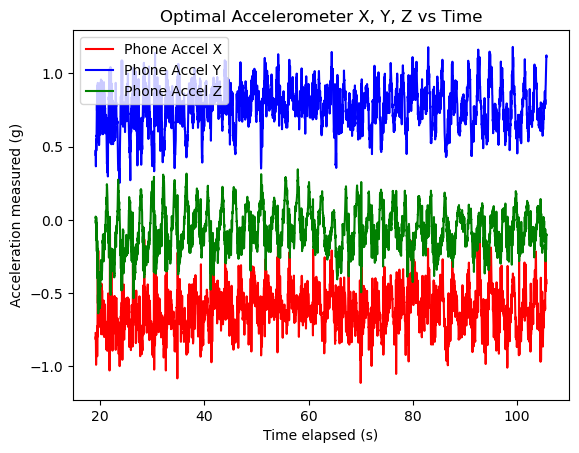

In [11]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:endmark], PhoneAccelZ[startmark:endmark], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()



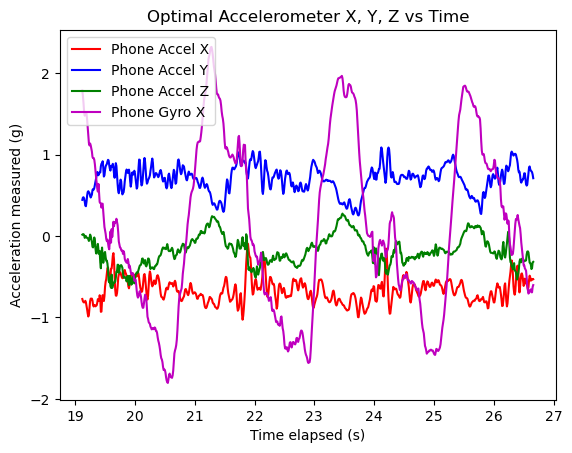

In [16]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")


tl = 750

plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 
plt.plot(cdate[startmark:startmark+tl], PhoneGyroX[startmark:startmark+tl], "-m", label="Phone Gyro X") 

plt.legend(loc="upper left")
plt.show()

# use gyro x as an indicator of when to split

In [39]:
splitdf = pd.DataFrame({"timekeeper": [0,0],
                        "Elapsed time (s)": [0,0],
                        "Phone-Accel-Z": [0,0],
                        "Phone-Accel-Y": [0,0],
                        "Phone-Accel-X": [0,0],
                        "Watch-Accel-Z": [0,0],
                        "Watch-Accel-Y": [0,0],
                        "Watch-Accel-X": [0,0],
                        "Phone-Gyro-Z": [0,0],
                        "Phone-Gyro-Y": [0,0],
                        "Phone-Gyro-X": [0,0],
                        "Watch-Gyro-Z": [0,0],
                        "Watch-Gyro-Y": [0,0],
                        "Watch-Gyro-X": [0,0],
                        "Phone-Mag-Z": [0,0],
                        "Phone-Mag-Y": [0,0],
                        "Phone-Mag-X": [0,0],
                        "Watch-Mag-Z": [0,0],
                        "Watch-Mag-Y": [0,0],
                        "Watch-Mag-X": [0,0],
                       })

print(splitdf)



lst = 0
i = startmark
totcount = 0

totalfeatures = []
totallabels = []

currentfeatures = [0,[],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[]]

nf = 0

while (i < endmark):
    indicator = PhoneGyroX[i]
    
    # figure out whether this is a good enough indicator
    nxt = PhoneGyroX[i+1]
        
        
    # make sure it hasnt been triggered in the last 150 iterations
    if (indicator > 1.5 and nxt < indicator and i-lst > 150 and i != startmark):
        lst = i
        
        totalfeatures.append(currentfeatures)
        totallabels.append(1) # 1 inoptimal
        
        nf += 1
        
        currentfeatures = [nf,[],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[]]
        # cut it off, add two blanks
        
#         for j in range(100):
#             splitdf.loc[len(splitdf)] = [totcount,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0]
#             totcount += 1
            
    currentfeatures[1].append(PhoneAccelZ[i])
    currentfeatures[2].append(PhoneAccelY[i])
    currentfeatures[3].append(PhoneAccelX[i])
    
    currentfeatures[4].append(WatchAccelZ[i])
    currentfeatures[5].append(WatchAccelY[i])
    currentfeatures[6].append(WatchAccelX[i])
    
    currentfeatures[7].append(PhoneGyroZ[i])
    currentfeatures[8].append(PhoneGyroY[i])
    currentfeatures[9].append(PhoneGyroX[i])
    
    currentfeatures[10].append(WatchGyroZ[i])
    currentfeatures[11].append(WatchGyroY[i])
    currentfeatures[12].append(WatchGyroX[i])
    
    currentfeatures[13].append(PhoneMagZ[i])
    currentfeatures[14].append(PhoneMagY[i])
    currentfeatures[15].append(PhoneMagX[i])
   
    currentfeatures[16].append(WatchMagZ[i])
    currentfeatures[17].append(WatchMagY[i])
    currentfeatures[18].append(WatchMagX[i])
    

    
#     splitdf.loc[len(splitdf)] = [totcount,cdate[i],
#                                  PhoneAccelZ[i], PhoneAccelY[i], PhoneAccelX[i],
#                                  WatchAccelZ[i], WatchAccelY[i], WatchAccelX[i],
#                                  PhoneGyroZ[i], PhoneGyroY[i], PhoneGyroX[i],
#                                  WatchGyroZ[i], WatchGyroY[i], WatchGyroX[i],
#                                  PhoneMagZ[i], PhoneMagY[i], PhoneMagX[i],
#                                  WatchMagZ[i], WatchMagY[i], WatchMagX[i]]
    totcount += 1
    
#     print(splitdf)
    i += 1
    

   timekeeper  Elapsed time (s)  Phone-Accel-Z  Phone-Accel-Y  Phone-Accel-X  \
0           0                 0              0              0              0   
1           0                 0              0              0              0   

   Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  Phone-Gyro-Z  Phone-Gyro-Y  \
0              0              0              0             0             0   
1              0              0              0             0             0   

   Phone-Gyro-X  Watch-Gyro-Z  Watch-Gyro-Y  Watch-Gyro-X  Phone-Mag-Z  \
0             0             0             0             0            0   
1             0             0             0             0            0   

   Phone-Mag-Y  Phone-Mag-X  Watch-Mag-Z  Watch-Mag-Y  Watch-Mag-X  
0            0            0            0            0            0  
1            0            0            0            0            0  


In [40]:
totalfeatures

[[0,
  [0.01635742188],
  [0.4442596436],
  [-0.7737579346],
  [-0.9609985352],
  [0.02108764648],
  [-0.3781585693],
  [1.231315494],
  [-0.5798809528],
  [1.787316918],
  [0.314986974],
  [-0.05064719915],
  [0.07674457878],
  [-302.6186523],
  [-51.60043335],
  [-129.5299835],
  [-48.11503601],
  [66.8205719],
  [149.8935547]],
 [1,
  [0.02252197266,
   0.0223236084,
   0.01182556152,
   -0.02270507813,
   -0.01275634766,
   -0.001571655273,
   -0.01928710938,
   -0.02325439453,
   -0.02522277832,
   -0.03912353516,
   -0.06112670898,
   -0.03164672852,
   0.01727294922,
   0.0002746582031,
   -0.07290649414,
   -0.1329956055,
   -0.1399993896,
   -0.0863494873,
   -0.01831054688,
   -0.05244445801,
   -0.1522674561,
   -0.2136535645,
   -0.2145233154,
   -0.1446838379,
   -0.09716796875,
   -0.1745910645,
   -0.2206420898,
   -0.1835174561,
   -0.3238983154,
   -0.3963470459,
   -0.2282714844,
   -0.1419525146,
   -0.260848999,
   -0.3286590576,
   -0.2857971191,
   -0.2085571289,


In [41]:
totallabels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [42]:
import csv

In [43]:
with open('../Trainable data/Anthony/Anthony_Inoptimal_Training_Data.csv', 'w') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    for j in totalfeatures:
        write.writerow(j)

In [44]:
with open('../Trainable data/Anthony/Anthony_Inoptimal_Training_Labels.csv', 'w') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerow(totallabels)

In [18]:
splitdf

,timekeeper,Elapsed time (s),Phone-Accel-Z,Phone-Accel-Y,Phone-Accel-X,Watch-Accel-Z,Watch-Accel-Y,Watch-Accel-X,Phone-Gyro-Z,Phone-Gyro-Y,Phone-Gyro-X,Watch-Gyro-Z,Watch-Gyro-Y,Watch-Gyro-X,Phone-Mag-Z,Phone-Mag-Y,Phone-Mag-X,Watch-Mag-Z,Watch-Mag-Y,Watch-Mag-X
0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,10695.0,105.64,-0.156876,1.100037,-0.414658,-0.989044,-0.043213,-0.171158,0.752218,-1.225667,0.615787,-0.013014,-0.012706,-0.007956,-305.278442,-44.363586,-118.379883,-53.490005,68.091370,161.324570
10698,10696.0,105.65,-0.126007,1.105804,-0.425430,-0.988235,-0.042252,-0.167297,0.694973,-1.272625,0.740239,-0.008589,-0.010293,-0.015298,-305.494324,-44.523834,-118.050644,-53.236816,67.920990,161.224838
10699,10697.0,105.66,-0.101456,1.115097,-0.425735,-0.985550,-0.041031,-0.169769,0.589288,-1.305784,0.872787,-0.010867,-0.007751,-0.023869,-304.990478,-44.489914,-118.227295,-53.456467,68.055252,161.275299
10700,10698.0,105.67,-0.096466,1.123108,-0.427826,-0.991898,-0.041443,-0.172775,0.471038,-1.335776,0.987554,-0.016709,-0.004376,-0.023889,-305.298950,-44.629807,-117.982773,-53.357636,68.070496,161.184830


In [19]:
splitdf.to_csv('../Data split into strokes/Anthony_Inoptimal_Split.csv')

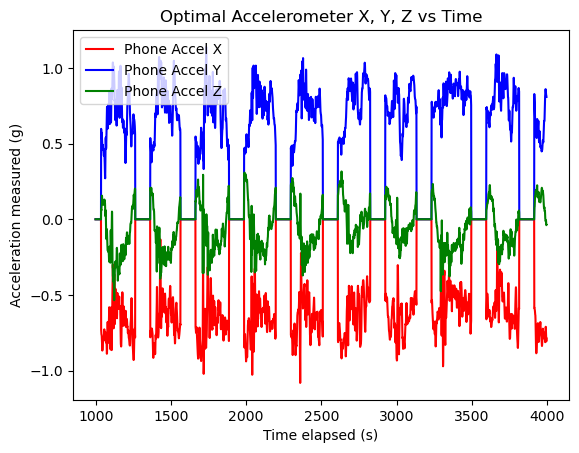

In [20]:
m1 = pd.read_csv("../Data split into strokes/Anthony_Inoptimal_Split.csv")

Splitcdate = m1["timekeeper"]

s1 = 1000
it = 3000

# print(m1)

SplitPhoneAccelZ = m1["Phone-Accel-Z"]
SplitPhoneAccelY = m1["Phone-Accel-Y"]
SplitPhoneAccelX = m1["Phone-Accel-X"]

plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelX[s1:s1+it], "-r", label="Phone Accel X") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelY[s1:s1+it], "-b", label="Phone Accel Y") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelZ[s1:s1+it], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()

11729
11729


ValueError: Length of values (11728) does not match length of index (11729)

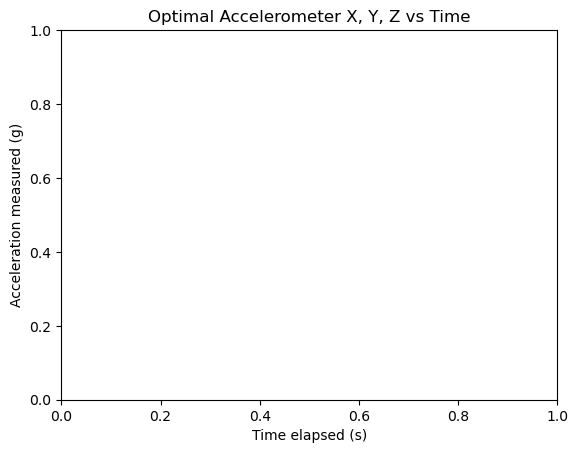

In [97]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")


print(m['Phone-Accel-X'].size)
print(m['Elapsed time (s)'].size)

# Phone-Accel-Z
m['y_p'] = np.diff(m['Phone-Accel-X']) / np.diff(m['Elapsed time (s)'])
print("worky")
m['x_p'] = (np.array(m['Elapsed time (s)'])[:-1] + np.array(m['Elapsed time (s)'])[1:]) / 2

plt.figure(1)
plt.plot(data['x'], data['y'], 'r')
plt.plot(data['x_p'], data['y_p'], 'b')
plt.show()

#plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 

# plt.legend(loc="upper left")
# plt.show()

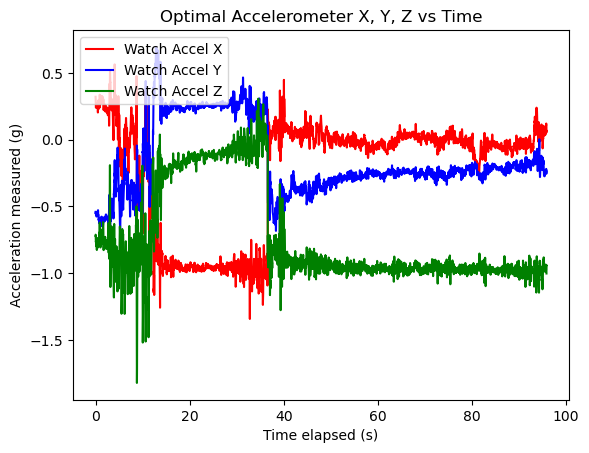

In [8]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchAccelX[startmark:endmark], "-r", label="Watch Accel X") 
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-b", label="Watch Accel Y") 
plt.plot(cdate[startmark:endmark], WatchAccelZ[startmark:endmark], "-g", label="Watch Accel Z") 

plt.legend(loc="upper left")
plt.show()


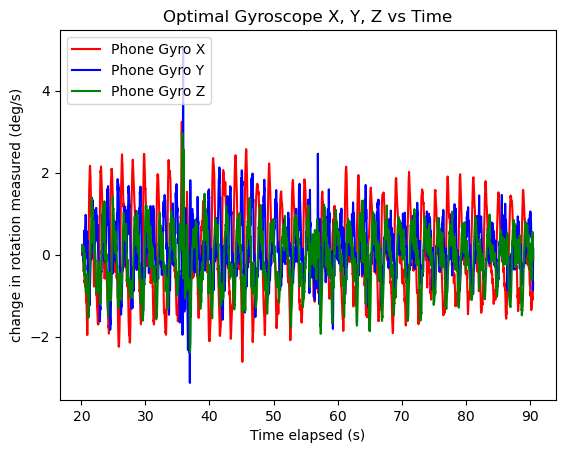

In [12]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneGyroX[startmark:endmark], "-r", label="Phone Gyro X") 
plt.plot(cdate[startmark:endmark], PhoneGyroY[startmark:endmark], "-b", label="Phone Gyro Y") 
plt.plot(cdate[startmark:endmark], PhoneGyroZ[startmark:endmark], "-g", label="Phone Gyro Z") 

plt.legend(loc="upper left")
plt.show()



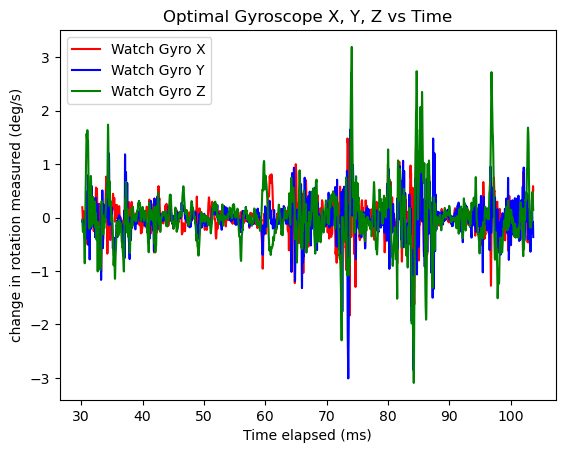

In [44]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchGyroX[startmark:endmark], "-r", label="Watch Gyro X") 
plt.plot(cdate[startmark:endmark], WatchGyroY[startmark:endmark], "-b", label="Watch Gyro Y") 
plt.plot(cdate[startmark:endmark], WatchGyroZ[startmark:endmark], "-g", label="Watch Gyro Z") 

plt.legend(loc="upper left")
plt.show()

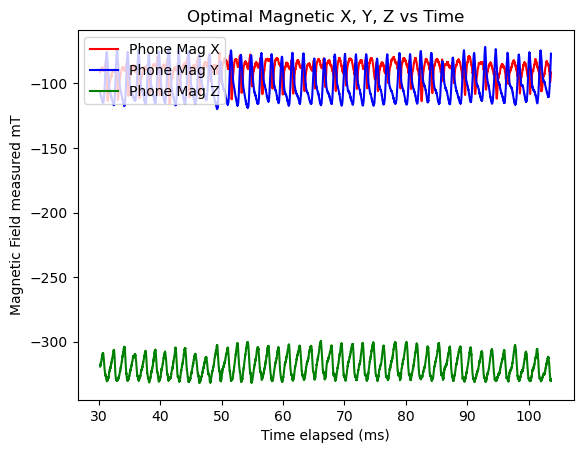

In [45]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[v:endmark], PhoneMagX[startmark:endmark], "-r", label="Phone Mag X") 
plt.plot(cdate[startmark:endmark], PhoneMagY[startmark:endmark], "-b", label="Phone Mag Y") 
plt.plot(cdate[startmark:endmark], PhoneMagZ[startmark:endmark], "-g", label="Phone Mag Z") 

plt.legend(loc="upper left")
plt.show()

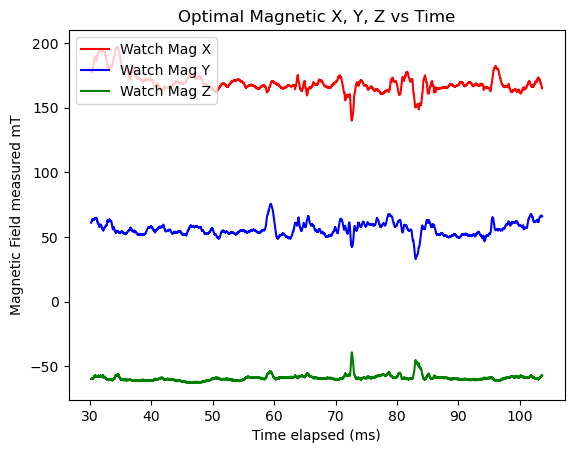

In [46]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchMagX[startmark:endmark], "-r", label="Watch Mag X") 
plt.plot(cdate[startmark:endmark], WatchMagY[startmark:endmark], "-b", label="Watch Mag Y") 
plt.plot(cdate[startmark:endmark], WatchMagZ[startmark:endmark], "-g", label="Watch Mag Z") 

plt.legend(loc="upper left")
plt.show()

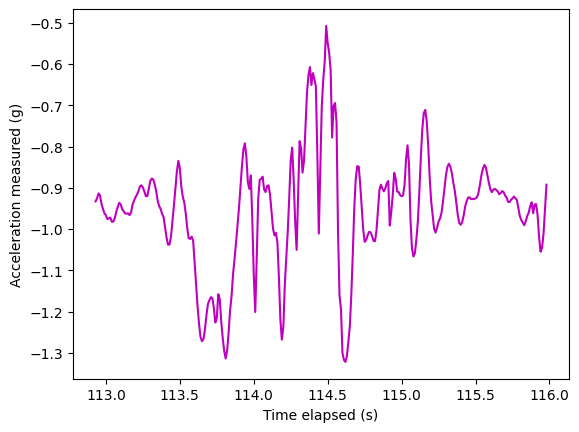

In [79]:
i = 0
# plt.title("Optimal Phone Accelerometer Y vs Time")
plt.xlabel("Time elapsed (s)")
plt.ylabel("Force measured (g)")
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-m") 

# plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark]) 
# plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark]) 
plt.show()

sleep(15)

foundthreshold = 0

while (i < len(cdate)):
    low = 0
#     if (cdate[i] > startmark and foundthreshold == 0):
#         foundthreshold = i
#         low = i
#     elif (cdate[i] > startmark):
#         low = foundthreshold
    
    if (i >= startmark):
        low = startmark
        if (i-low > 500):
            low = i-500
    
        
    plt.xlabel("Time elapsed (s)")
    plt.ylabel("Acceleration measured (g)")
    #plt.plot(cdate[low:i], WatchAccelX[low:i], "-b") 
    #plt.plot(cdate[low:i], PhoneAccelY[low:i], "-r") 
    #plt.plot(cdate[low:i], PhoneAccelZ[low:i], "-g") 
    plt.plot(cdate[low:i], WatchAccelZ[low:i], "-m") 


    plt.draw()
    plt.pause(0.1)
    clear_output(wait=True)
    i += 10